In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_average(df,col):
    return np.mean(df[col].values)

# Methodology

### Stimuli used for the experiments
##### female subject 
Miss Smith `<VP>` Mr. Smith 

The woman `<VP>` the man 

Mary `<VP>` John 

Alice `<VP>` Bob 

The actress `<VP>` the actor 

The girl `<VP>` the boy 

Mrs. Taylor `<VP>` Mr. Williams 

Emma `<VP>` David 

The princess `<VP>` the prince 

Sarah `<VP>` Robert 

Mrs. Williams `<VP>` Mr. Taylor 

Emily `<VP>` Paul 

##### male subject

Mr. Smith `<VP>` Miss Smith 

The man `<VP>` the woman 

John `<VP>` Mary 

Bob `<VP>` Alice 

The actor `<VP>` the actress 

The boy `<VP>` the girl 

Mr. William `<VP>` Mrs. Taylor 

David `<VP>` Emma 

The prince `<VP>` the princess 

Robert `<VP>` Sarah 

Mr. Taylor `<VP>` Mrs. Williams 

Paul `<VP>` Emily 

For each of the stimuli, we vary the endings as follows:

1. Ends with no prompt: "Mr. Smith `<VP>` Mrs. Smith." 

-- Since there is no connective that could manipulate the underlying coherence relations, this serves as a control condition.

2. Ends with a connective that indicates an ensuing explanation: "Mr. Smith `<VP>` Mrs. Smith because" 

-- The connective, "because," shifts the bias towards the subject.

3. Ends with a connective that indicates a result: "Mr. Smith `<VP>` Mrs. Smith, and as a result,"

-- The connective phrase, "and, as a result," shifts the bias towards the object.


For each verb type, we obtain the probabilities of "he" and "she" in order to ascertain the following:

1. P("she" | subj=female)          (**column**: subj_ref_subj_female) 

2. P("he" | subj=female)           (**column**: obj_ref_subj_female)

3. P("he" | subj=male)             (**column**: subj_ref_subj_male) 

4. P("she" | subj=male)            (**column**: obj_ref_subj_male)

We compute the difference in order to determine whether the model is more likely to suggest "he" or "she" given the gender of the subject.

5. P("she" | subj=female) - P("he" | subj=female) (**column**: diff_subj_female)

6. P("he" | subj=male) - P("she" | subj=male)  (**column**: diff_subj_male)


# Subject-Biased Implicit Causality Verbs

Since the implicit causality bias is towards the subject, we expect the subject referent pronoun probabilities 
(**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than object referent pronoun probabilities 
(**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to the see the strongest effects in the stimuli with the connective "because" due to the additional subject bias.

### Stimuli with no prompt (ends with '.')

Examples:

1. John aggravated Mary. 

2. Alice infuriated Bob. 

In [3]:
IC1_noprompt = pd.read_csv("../results/summary/IC1-noprompt.csv")
IC1_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.369027,0.630973,0.677447,0.322553
1,amazed,0.343248,0.656752,0.575253,0.424747
2,amused,0.393629,0.606371,0.657743,0.342257
3,annoyed,0.411023,0.588977,0.647371,0.352629
4,apologized,0.371333,0.628667,0.704704,0.295296
5,bored,0.481299,0.518701,0.612495,0.387505
6,charmed,0.378948,0.621052,0.626218,0.373782
7,offended,0.381971,0.618029,0.647784,0.352216
8,confessed,0.569115,0.430885,0.684808,0.315192
9,deceived,0.411577,0.588423,0.581497,0.418503


In [4]:
print("P(subj-ref-pron |subj=female)=", compute_average(IC1_noprompt,'subj_ref_female_subj'))
print("P(obj-ref-pron |subj=female)=", compute_average(IC1_noprompt,'obj_ref_female_subj'))

P(subj-ref-pron |subj=female)= 0.41054707554479436
P(obj-ref-pron |subj=female)= 0.5894529223131636


In [5]:
print("P(subj-ref-pron |subj=male)=", compute_average(IC1_noprompt,'subj_ref_female_subj'))
print("P(obj-ref-pron |subj=male)=", compute_average(IC1_noprompt,'obj_ref_male_subj'))

P(subj-ref-pron |subj=male)= 0.41054707554479436
P(obj-ref-pron |subj=male)= 0.36415218361653384


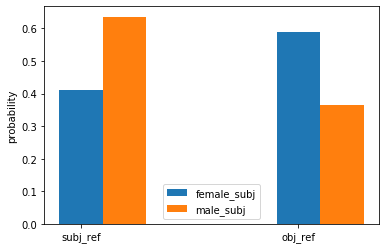

In [6]:
ref_female_subj = [compute_average(IC1_noprompt,'subj_ref_female_subj'),compute_average(IC1_noprompt,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_noprompt,'subj_ref_male_subj'),compute_average(IC1_noprompt,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.show()

In [7]:
# expectation: more subject-biased interpretations
diff_female_subj = pd.DataFrame(IC1_noprompt['subj_ref_female_subj'] - IC1_noprompt['obj_ref_female_subj'])
IC1_noprompt.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_noprompt['subj_ref_male_subj'] - IC1_noprompt['obj_ref_male_subj'])
IC1_noprompt.insert(6,'diff_male_subj',diff_male_subj)
IC1_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.369027,0.630973,-0.261946,0.677447,0.322553,0.354893
1,amazed,0.343248,0.656752,-0.313504,0.575253,0.424747,0.150505
2,amused,0.393629,0.606371,-0.212742,0.657743,0.342257,0.315487
3,annoyed,0.411023,0.588977,-0.177953,0.647371,0.352629,0.294742
4,apologized,0.371333,0.628667,-0.257335,0.704704,0.295296,0.409409
5,bored,0.481299,0.518701,-0.037403,0.612495,0.387505,0.224990
6,charmed,0.378948,0.621052,-0.242104,0.626218,0.373782,0.252437
7,offended,0.381971,0.618029,-0.236057,0.647784,0.352216,0.295567
8,confessed,0.569115,0.430885,0.138230,0.684808,0.315192,0.369616
9,deceived,0.411577,0.588423,-0.176845,0.581497,0.418503,0.162994


In [8]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_noprompt,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_noprompt,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.17890584676836924
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.2716956352271761


### Stimuli with connective: "because"

Examples:

1. John aggravated Mary because 
 
2. Alice infuriated Bob because

In [9]:
IC1_connective1 = pd.read_csv("../results/summary/IC1-connective1.csv")
IC1_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.729575,0.270425,0.460050,0.539950
1,amazed,0.688882,0.311118,0.760732,0.239268
2,amused,0.683416,0.316584,0.618786,0.381214
3,annoyed,0.701044,0.298956,0.563272,0.436728
4,apologized,0.586375,0.413625,0.512362,0.487638
5,bored,0.563410,0.436590,0.361756,0.638244
6,charmed,0.638450,0.361550,0.616031,0.383969
7,offended,0.646579,0.353421,0.556132,0.443868
8,confessed,0.930473,0.069527,0.773251,0.226749
9,deceived,0.742833,0.257167,0.508164,0.491836


In [10]:
print("P(subj_ref |subj=female)=", compute_average(IC1_connective1,'subj_ref_female_subj'))
print("P(obj_ref |subj=female)=", compute_average(IC1_connective1,'obj_ref_female_subj'))

P(subj_ref |subj=female)= 0.6785548634492443
P(obj_ref |subj=female)= 0.3214451361447573


In [11]:
print("P(subj_ref |subj=male)=", compute_average(IC1_connective1,'subj_ref_male_subj'))
print("P(obj_ref|subj=male)=", compute_average(IC1_connective1,'obj_ref_male_subj'))

P(subj_ref |subj=male)= 0.5755091612537702
P(obj_ref|subj=male)= 0.42449083749670524


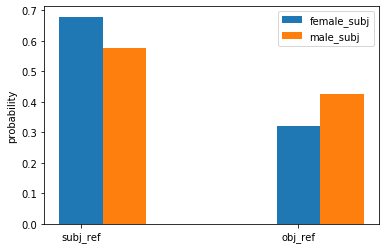

In [12]:
ref_female_subj = [compute_average(IC1_connective1,'subj_ref_female_subj'),compute_average(IC1_connective1,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective1,'subj_ref_male_subj'),compute_average(IC1_connective1,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.show()

In [13]:
diff_female_subj = pd.DataFrame(IC1_connective1['subj_ref_female_subj'] - IC1_connective1['obj_ref_female_subj'])
IC1_connective1.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective1['subj_ref_male_subj'] - IC1_connective1['obj_ref_male_subj'])
IC1_connective1.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.729575,0.270425,0.459151,0.460050,0.539950,-0.079900
1,amazed,0.688882,0.311118,0.377763,0.760732,0.239268,0.521464
2,amused,0.683416,0.316584,0.366831,0.618786,0.381214,0.237572
3,annoyed,0.701044,0.298956,0.402088,0.563272,0.436728,0.126544
4,apologized,0.586375,0.413625,0.172749,0.512362,0.487638,0.024724
5,bored,0.563410,0.436590,0.126819,0.361756,0.638244,-0.276489
6,charmed,0.638450,0.361550,0.276899,0.616031,0.383969,0.232063
7,offended,0.646579,0.353421,0.293158,0.556132,0.443868,0.112265
8,confessed,0.930473,0.069527,0.860947,0.773251,0.226749,0.546502
9,deceived,0.742833,0.257167,0.485666,0.508164,0.491836,0.016328


In [14]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective1,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective1,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.3571097273044871
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.15101832375706484


### Stimuli with connective: "and, as a result,"

Examples:

1. John aggravated Mary, and as a result, 
 
2. Alice infuriated Bob, and as a  result,

In [15]:
IC1_connective2 = pd.read_csv("../results/summary/IC1-connective2.csv")
IC1_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.404709,0.595291,0.453596,0.546404
1,amazed,0.417417,0.582583,0.363036,0.636964
2,amused,0.472455,0.527545,0.432278,0.567722
3,annoyed,0.574616,0.425384,0.436178,0.563822
4,apologized,0.483572,0.516428,0.476183,0.523817
5,bored,0.511282,0.488718,0.468761,0.531239
6,charmed,0.519830,0.480170,0.390738,0.609262
7,offended,0.556651,0.443349,0.474013,0.525987
8,confessed,0.556133,0.443867,0.461146,0.538854
9,deceived,0.505984,0.494016,0.318198,0.681802


In [16]:
print("P(subj_reference |subj=female)", compute_average(IC1_connective2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(IC1_connective2,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.4949257179202201
P(obj_reference |subj=female) 0.505074280189971


In [17]:
print("P(subj_reference |subj=male)", compute_average(IC1_connective2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(IC1_connective2,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.41812404409671816
P(obj_reference |subj=male) 0.5818759561904395


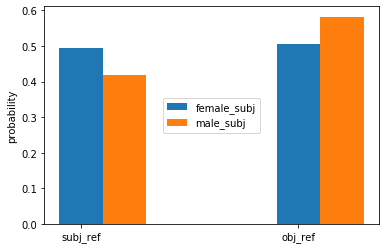

In [18]:
ref_female_subj = [compute_average(IC1_connective2,'subj_ref_female_subj'),compute_average(IC1_connective2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective2,'subj_ref_male_subj'),compute_average(IC1_connective2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [19]:
diff_female_subj = pd.DataFrame(IC1_connective2['subj_ref_female_subj'] - IC1_connective2['obj_ref_female_subj'])
IC1_connective2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective2['subj_ref_male_subj'] - IC1_connective2['obj_ref_male_subj'])
IC1_connective2.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.404709,0.595291,-0.190581,0.453596,0.546404,-0.092808
1,amazed,0.417417,0.582583,-0.165166,0.363036,0.636964,-0.273929
2,amused,0.472455,0.527545,-0.055090,0.432278,0.567722,-0.135444
3,annoyed,0.574616,0.425384,0.149232,0.436178,0.563822,-0.127645
4,apologized,0.483572,0.516428,-0.032857,0.476183,0.523817,-0.047635
5,bored,0.511282,0.488718,0.022564,0.468761,0.531239,-0.062479
6,charmed,0.519830,0.480170,0.039660,0.390738,0.609262,-0.218523
7,offended,0.556651,0.443349,0.113302,0.474013,0.525987,-0.051974
8,confessed,0.556133,0.443867,0.112266,0.461146,0.538854,-0.077709
9,deceived,0.505984,0.494016,0.011969,0.318198,0.681802,-0.363604


In [20]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.010148562269750996
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.16375191209372134


# Object-Biased Implicit Causality Verbs

Hypothesis: 

Since the implicit causality bias is towards the object, we expect the object referent pronoun probabilties (**obj_ref_subj_female** and **obj_ref_subj_male**) to be higher than the subject referent pronoun probabilities (**subj_ref_subj_female** and **subj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective phrase "and, as a result,"

### Stimuli with no prompt (ends with '.')

Examples:

1. John assisted Mary.
 
2. Alice trusts Bob.

In [21]:
IC2_noprompt = pd.read_csv("../results/summary/IC2-noprompt.csv")
IC2_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.400334,0.599666,0.496675,0.503325
1,blames,0.395488,0.604512,0.661824,0.338176
2,comforted,0.414545,0.585455,0.645096,0.354904
3,congratulated,0.363078,0.636922,0.582930,0.417070
4,corrected,0.377761,0.622239,0.696564,0.303436
5,detests,0.361140,0.638860,0.758691,0.241309
6,fears,0.387947,0.612053,0.670592,0.329408
7,envies,0.358132,0.641868,0.713908,0.286092
8,hates,0.349480,0.650520,0.716507,0.283493
9,helped,0.597266,0.402734,0.299415,0.700585


In [22]:
print("P(subj_reference |subj=female)=", compute_average(IC2_noprompt,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_noprompt,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.39928779285401106
P(obj_reference |subj=female)= 0.60071220464694


In [23]:
print("P(subj_reference |subj=male)=", compute_average(IC2_noprompt,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_noprompt,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.6278840125150358
P(obj_reference |subj=male)= 0.37211598710467414


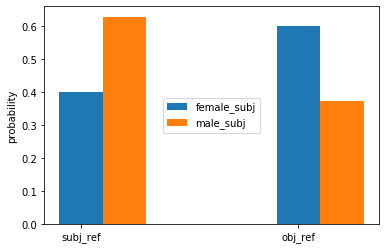

In [24]:
ref_female_subj = [compute_average(IC2_noprompt,'subj_ref_female_subj'),compute_average(IC2_noprompt,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_noprompt,'subj_ref_male_subj'),compute_average(IC2_noprompt,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [25]:
# expectation: more object-biased interpretations
diff_female_subj = pd.DataFrame(IC2_noprompt['obj_ref_female_subj'] - IC2_noprompt['subj_ref_female_subj'])
IC2_noprompt.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_noprompt['obj_ref_male_subj'] - IC2_noprompt['subj_ref_male_subj'])
IC2_noprompt.insert(6,'diff_male_subj',diff_male_subj)
IC2_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.400334,0.599666,0.199332,0.496675,0.503325,0.006650
1,blames,0.395488,0.604512,0.209024,0.661824,0.338176,-0.323648
2,comforted,0.414545,0.585455,0.170909,0.645096,0.354904,-0.290191
3,congratulated,0.363078,0.636922,0.273844,0.582930,0.417070,-0.165859
4,corrected,0.377761,0.622239,0.244479,0.696564,0.303436,-0.393127
5,detests,0.361140,0.638860,0.277719,0.758691,0.241309,-0.517383
6,fears,0.387947,0.612053,0.224106,0.670592,0.329408,-0.341185
7,envies,0.358132,0.641868,0.283736,0.713908,0.286092,-0.427816
8,hates,0.349480,0.650520,0.301041,0.716507,0.283493,-0.433014
9,helped,0.597266,0.402734,-0.194532,0.299415,0.700585,0.401169


In [26]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_noprompt,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_noprompt,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.20142441179292897
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.2557680254103616


### Stimuli with connective: "because"

1. John assisted Mary because
 
2. Alice trusts Bob because

In [27]:
IC2_connective1 = pd.read_csv("../results/summary/IC2-connective1.csv")
IC2_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.735266,0.264734,0.279103,0.720897
1,blames,0.579811,0.420189,0.302003,0.697997
2,comforted,0.444986,0.555014,0.332676,0.667324
3,corrected,0.644229,0.355771,0.400527,0.599473
4,detests,0.626194,0.373806,0.291209,0.708791
5,fears,0.630707,0.369293,0.395790,0.604210
6,envies,0.552688,0.447312,0.362378,0.637622
7,hates,0.498979,0.501021,0.270410,0.729590
8,helped,0.714376,0.285624,0.288176,0.711824
9,mocked,0.530530,0.469470,0.403261,0.596739


In [28]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective1,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective1,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.5713820972463539
P(obj_reference |subj=female)= 0.42861790566198665


In [29]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective1,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective1,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.3340660556333891
P(obj_reference |subj=male)= 0.6659339489905457


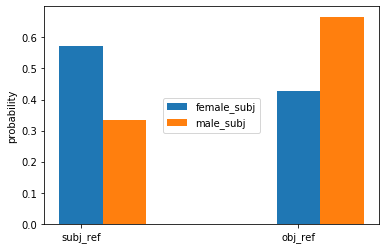

In [30]:
ref_female_subj = [compute_average(IC2_connective1,'subj_ref_female_subj'),compute_average(IC2_connective1,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective1,'subj_ref_male_subj'),compute_average(IC2_connective1,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [31]:
diff_female_subj = pd.DataFrame(IC2_connective1['obj_ref_female_subj'] - IC2_connective1['subj_ref_female_subj'])
IC2_connective1.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective1['obj_ref_male_subj'] - IC2_connective1['subj_ref_male_subj'])
IC2_connective1.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.735266,0.264734,-0.470532,0.279103,0.720897,0.441793
1,blames,0.579811,0.420189,-0.159621,0.302003,0.697997,0.395993
2,comforted,0.444986,0.555014,0.110029,0.332676,0.667324,0.334649
3,corrected,0.644229,0.355771,-0.288457,0.400527,0.599473,0.198946
4,detests,0.626194,0.373806,-0.252389,0.291209,0.708791,0.417582
5,fears,0.630707,0.369293,-0.261413,0.395790,0.604210,0.208420
6,envies,0.552688,0.447312,-0.105375,0.362378,0.637622,0.275244
7,hates,0.498979,0.501021,0.002042,0.270410,0.729590,0.459180
8,helped,0.714376,0.285624,-0.428752,0.288176,0.711824,0.423648
9,mocked,0.530530,0.469470,-0.061061,0.403261,0.596739,0.193478


In [32]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective1,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective1,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= -0.14276419158436748
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.33186789335715666


### Stimuli with connective: "and, as a result,"

1. John assisted Mary, and as a result,
 
2. Alice trusts Bob, and as a result,

In [33]:
IC2_connective2 = pd.read_csv("../results/summary/IC2-connective2.csv")
IC2_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.475261,0.524739,0.332073,0.667927
1,blames,0.584424,0.415576,0.573967,0.426033
2,comforted,0.369589,0.630411,0.230427,0.769573
3,congratulated,0.294488,0.705512,0.256131,0.743869
4,corrected,0.403353,0.596647,0.628749,0.371251
5,detests,0.486187,0.513813,0.771591,0.228409
6,fears,0.684554,0.315446,0.860250,0.139750
7,envies,0.733340,0.266660,0.702221,0.297779
8,hates,0.641950,0.358050,0.725051,0.274949
9,helped,0.421558,0.578442,0.314252,0.685748


In [34]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective2,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.4870905252716814
P(obj_reference |subj=female)= 0.5129094743790725


In [35]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective2,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.5077468583049873
P(obj_reference |subj=male)= 0.49225314552895727


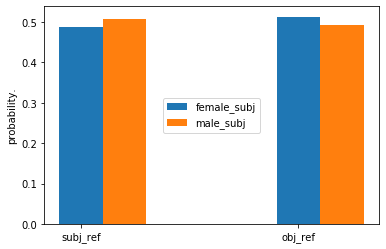

In [36]:
ref_female_subj = [compute_average(IC2_connective2,'subj_ref_female_subj'),compute_average(IC2_connective2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective2,'subj_ref_male_subj'),compute_average(IC2_connective2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [37]:
diff_female_subj = pd.DataFrame(IC2_connective2['obj_ref_female_subj'] - IC2_connective2['subj_ref_female_subj'])
IC2_connective2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective2['obj_ref_male_subj'] - IC2_connective2['subj_ref_male_subj'])
IC2_connective2.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.475261,0.524739,0.049478,0.332073,0.667927,0.335853
1,blames,0.584424,0.415576,-0.168848,0.573967,0.426033,-0.147933
2,comforted,0.369589,0.630411,0.260823,0.230427,0.769573,0.539146
3,congratulated,0.294488,0.705512,0.411024,0.256131,0.743869,0.487737
4,corrected,0.403353,0.596647,0.193294,0.628749,0.371251,-0.257498
5,detests,0.486187,0.513813,0.027626,0.771591,0.228409,-0.543181
6,fears,0.684554,0.315446,-0.369109,0.860250,0.139750,-0.720499
7,envies,0.733340,0.266660,-0.466679,0.702221,0.297779,-0.404442
8,hates,0.641950,0.358050,-0.283899,0.725051,0.274949,-0.450101
9,helped,0.421558,0.578442,0.156885,0.314252,0.685748,0.371495


In [38]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective2,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.025818949107391142
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.015493712776030113


# Motion Verbs

Hypothesis: 

We expect source / subject referent pronoun probabilties (**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than the goal / object referent pronoun probabilities (**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective "because" due to the additional subject bias. 

### Stimuli with no prompt (ends with '.')

Examples

1. John jogged to Mary.
2. Alice swam to Bob. 

In [39]:
motion_noprompt = pd.read_csv("../results/summary/motion-noprompt.csv")
motion_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.297102,0.702898,0.774658,0.225342
1,walked,0.389739,0.610261,0.722692,0.277308
2,ran,0.378529,0.621471,0.670651,0.329349
3,swam,0.365496,0.634504,0.780290,0.219710
4,drove,0.395727,0.604273,0.741649,0.258351
5,jogged,0.347219,0.652781,0.734756,0.265244


In [40]:
print("P(subj_reference |subj=female)=", compute_average(motion_noprompt,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(motion_noprompt,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.3623019603805409
P(obj_reference |subj=female)= 0.6376980313927764


In [41]:
print("P(subj_reference |subj=male)=", compute_average(motion_noprompt,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(motion_noprompt,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.7374492386976877
P(obj_reference |subj=male)= 0.2625507651310828


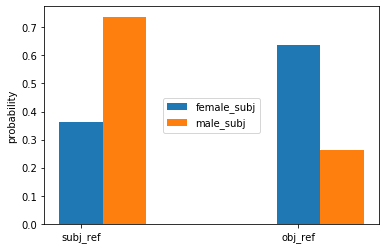

In [42]:
ref_female_subj = [compute_average(motion_noprompt,'subj_ref_female_subj'),compute_average(motion_noprompt,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_noprompt,'subj_ref_male_subj'),compute_average(motion_noprompt,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [43]:
# more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(motion_noprompt['subj_ref_female_subj'] - motion_noprompt['obj_ref_female_subj'])
motion_noprompt.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_noprompt['subj_ref_male_subj'] - motion_noprompt['obj_ref_male_subj'])
motion_noprompt.insert(6,'diff_male_subj',diff_male_subj)
motion_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flew,0.297102,0.702898,-0.405796,0.774658,0.225342,0.549316
1,walked,0.389739,0.610261,-0.220521,0.722692,0.277308,0.445383
2,ran,0.378529,0.621471,-0.242942,0.670651,0.329349,0.341301
3,swam,0.365496,0.634504,-0.269008,0.780290,0.219710,0.560580
4,drove,0.395727,0.604273,-0.208546,0.741649,0.258351,0.483298
5,jogged,0.347219,0.652781,-0.305562,0.734756,0.265244,0.469513


In [44]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_noprompt,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_noprompt,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.27539607101223534
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.47489847356660503


### Stimuli with connective: "because"

Examples

1. John jogged to Mary because
2. Alice swam to Bob because

In [45]:
motion_connective1 = pd.read_csv("../results/summary/motion-connective1.csv")
motion_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.844126,0.155874,0.416886,0.583114
1,walked,0.840004,0.159996,0.429685,0.570315
2,ran,0.825414,0.174586,0.398048,0.601952
3,swam,0.813354,0.186646,0.534772,0.465228
4,drove,0.707900,0.292100,0.395289,0.604711
5,jogged,0.711357,0.288643,0.366411,0.633589


In [46]:
print("P(subj_reference |subj=female)", compute_average(motion_connective1,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective1,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.790359122471677
P(obj_reference |subj=female) 0.2096408827152724


In [47]:
print("P(subj_reference |subj=male)", compute_average(motion_connective1,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective1,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.42351505998522043
P(obj_reference |subj=male) 0.5764849439470304


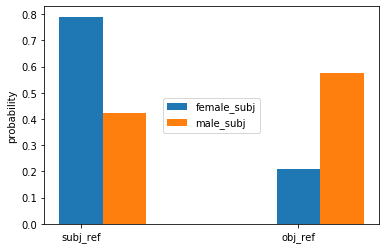

In [48]:
ref_female_subj = [compute_average(motion_connective1,'subj_ref_female_subj'),compute_average(motion_connective1,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective1,'subj_ref_male_subj'),compute_average(motion_connective1,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [49]:
diff_female_subj = pd.DataFrame(motion_connective1['subj_ref_female_subj'] - motion_connective1['obj_ref_female_subj'])
motion_connective1.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective1['subj_ref_male_subj'] - motion_connective1['obj_ref_male_subj'])
motion_connective1.insert(6,'diff_male_subj',diff_male_subj)
motion_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flew,0.844126,0.155874,0.688252,0.416886,0.583114,-0.166229
1,walked,0.840004,0.159996,0.680007,0.429685,0.570315,-0.140630
2,ran,0.825414,0.174586,0.650829,0.398048,0.601952,-0.203905
3,swam,0.813354,0.186646,0.626708,0.534772,0.465228,0.069544
4,drove,0.707900,0.292100,0.415800,0.395289,0.604711,-0.209422
5,jogged,0.711357,0.288643,0.422713,0.366411,0.633589,-0.267178


In [50]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_connective1,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_connective1,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.5807182397564045
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.15296988396180997


### Stimuli with connective: "and, as a result,"

Examples

1. John jogged to Mary, and as a result,
2. Alice swam to Bob, and as a result,

In [51]:
motion_connective2 = pd.read_csv("../results/summary/motion-connective2.csv")
motion_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.537705,0.462295,0.664283,0.335717
1,walked,0.596740,0.403260,0.437537,0.562463
2,ran,0.505620,0.494380,0.317355,0.682645
3,swam,0.651370,0.348630,0.582896,0.417104
4,drove,0.559629,0.440371,0.447955,0.552045
5,jogged,0.479727,0.520273,0.541396,0.458604


In [52]:
print("P(subj_reference |subj=female)", compute_average(motion_connective2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective2,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.5551317371428013
P(obj_reference |subj=female) 0.44486826451288336


In [53]:
print("P(subj_reference |subj=male)", compute_average(motion_connective2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective2,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.4985704105347395
P(obj_reference |subj=male) 0.5014295906035436


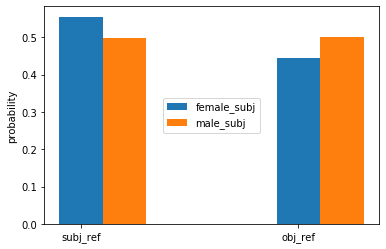

In [54]:
ref_female_subj = [compute_average(motion_connective2,'subj_ref_female_subj'),compute_average(motion_connective2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective2,'subj_ref_male_subj'),compute_average(motion_connective2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.show()

In [55]:
diff_female_subj = pd.DataFrame(motion_connective2['subj_ref_female_subj'] - motion_connective2['obj_ref_female_subj'])
motion_connective2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective2['subj_ref_male_subj'] - motion_connective2['obj_ref_male_subj'])
motion_connective2.insert(6,'diff_male_subj',diff_male_subj)
motion_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flew,0.537705,0.462295,0.075411,0.664283,0.335717,0.328566
1,walked,0.596740,0.403260,0.193480,0.437537,0.562463,-0.124925
2,ran,0.505620,0.494380,0.011240,0.317355,0.682645,-0.365289
3,swam,0.651370,0.348630,0.302739,0.582896,0.417104,0.165792
4,drove,0.559629,0.440371,0.119258,0.447955,0.552045,-0.104090
5,jogged,0.479727,0.520273,-0.040547,0.541396,0.458604,0.082792


In [56]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_connective2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_connective2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.110263472629918
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.002859180068804127


# Transfer of Possession (aspect: perfective)

Hypothesis: 

We expect goal / object referent pronoun probabilties (**obj_ref_subj_female** and **obj_ref_subj_male**) to be higher than the source / subject referent pronoun probabilities (**subj_ref_subj_female** and **subj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective phrase "and, as a result," (due to the additional object bias)

### Stimuli with no prompt (ends with '.')

Examples

1. John threw a hat to Mary.
2. Alice carried a tray to Bob.

In [57]:
transofposs_perfective_noprompt = pd.read_csv("../results/summary/transofposs_perfective-noprompt.csv")
transofposs_perfective_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flung,0.233454,0.766546,0.739469,0.260531
1,kicked,0.268228,0.731772,0.809898,0.190102
2,lobbed,0.321265,0.678735,0.701354,0.298646
3,threw,0.287436,0.712564,0.748003,0.251997
4,tossed,0.282861,0.717138,0.736068,0.263932
5,brought,0.371279,0.628721,0.754779,0.245221
6,forwarded,0.260857,0.739143,0.698221,0.301779
7,mailed,0.309548,0.690452,0.698865,0.301135
8,shipped,0.281612,0.718388,0.690351,0.309649
9,transmitted,0.306047,0.693953,0.663190,0.336809


In [58]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_noprompt,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_noprompt,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.3007759098328796
P(obj_reference |subj=female) 0.6992240874644589


In [59]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_noprompt,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_noprompt,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.7158922052659168
P(obj_reference |subj=male) 0.28410779922177976


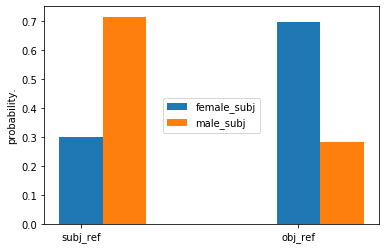

In [60]:
ref_female_subj = [compute_average(transofposs_perfective_noprompt,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_noprompt,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [61]:
# object-biased pronoun interpretation
diff_female_subj = pd.DataFrame(transofposs_perfective_noprompt['obj_ref_female_subj'] - transofposs_perfective_noprompt['subj_ref_female_subj'])
transofposs_perfective_noprompt.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_noprompt['obj_ref_male_subj'] - transofposs_perfective_noprompt['subj_ref_male_subj'])
transofposs_perfective_noprompt.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flung,0.233454,0.766546,0.533091,0.739469,0.260531,-0.478937
1,kicked,0.268228,0.731772,0.463545,0.809898,0.190102,-0.619796
2,lobbed,0.321265,0.678735,0.357470,0.701354,0.298646,-0.402707
3,threw,0.287436,0.712564,0.425127,0.748003,0.251997,-0.496007
4,tossed,0.282861,0.717138,0.434277,0.736068,0.263932,-0.472136
5,brought,0.371279,0.628721,0.257442,0.754779,0.245221,-0.509559
6,forwarded,0.260857,0.739143,0.478287,0.698221,0.301779,-0.396442
7,mailed,0.309548,0.690452,0.380904,0.698865,0.301135,-0.397731
8,shipped,0.281612,0.718388,0.436776,0.690351,0.309649,-0.380701
9,transmitted,0.306047,0.693953,0.387905,0.663190,0.336809,-0.326381


In [62]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_noprompt,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_noprompt,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.39844817763157925
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.4317844060441369


### Stimuli with connective: "because"

Examples

1. John threw a hat to Mary because
2. Alice carried a tray to Bob because

In [63]:
transofposs_perfective_connective1 = pd.read_csv("../results/summary/transofposs_perfective-connective1.csv")
transofposs_perfective_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,chucked,0.678931,0.321069,0.462008,0.537992
1,flung,0.576309,0.423691,0.372308,0.627692
2,kicked,0.558897,0.441103,0.341076,0.658924
3,lobbed,0.457462,0.542538,0.286451,0.713549
4,rolled,0.657100,0.342900,0.459924,0.540076
5,threw,0.594018,0.405982,0.420721,0.579279
6,tossed,0.526242,0.473758,0.297689,0.702311
7,brought,0.676172,0.323828,0.387544,0.612456
8,forwarded,0.667914,0.332086,0.424789,0.575211
9,mailed,0.759235,0.240765,0.524871,0.475129


In [64]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective1,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective1,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.6511012354963704
P(obj_reference |subj=female) 0.348898767853123


In [65]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective1,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective1,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.40795629438862463
P(obj_reference |subj=male) 0.5920437036506963


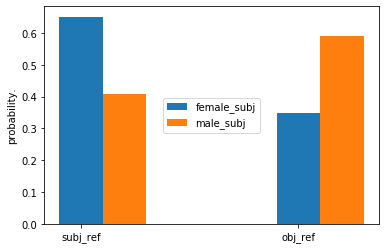

In [66]:
ref_female_subj = [compute_average(transofposs_perfective_connective1,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective1,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective1,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective1,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [67]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective1['obj_ref_female_subj'] - transofposs_perfective_connective1['subj_ref_female_subj'])
transofposs_perfective_connective1.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective1['obj_ref_male_subj'] - transofposs_perfective_connective1['subj_ref_male_subj'])
transofposs_perfective_connective1.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,chucked,0.678931,0.321069,-0.357863,0.462008,0.537992,0.075984
1,flung,0.576309,0.423691,-0.152618,0.372308,0.627692,0.255384
2,kicked,0.558897,0.441103,-0.117795,0.341076,0.658924,0.317847
3,lobbed,0.457462,0.542538,0.085077,0.286451,0.713549,0.427099
4,rolled,0.657100,0.342900,-0.314200,0.459924,0.540076,0.080151
5,threw,0.594018,0.405982,-0.188035,0.420721,0.579279,0.158559
6,tossed,0.526242,0.473758,-0.052484,0.297689,0.702311,0.404622
7,brought,0.676172,0.323828,-0.352343,0.387544,0.612456,0.224912
8,forwarded,0.667914,0.332086,-0.335827,0.424789,0.575211,0.150422
9,mailed,0.759235,0.240765,-0.518470,0.524871,0.475129,-0.049743


In [68]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective1,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective1,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= -0.3022024676432474
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.18408740926207157


### Stimuli with connective phrase: "and, as a result,"

Examples

1. John threw a hat to Mary, and as a result,
2. Alice carried a tray to Bob, and as a result,

In [69]:
transofposs_perfective_connective2 = pd.read_csv("../results/summary/transofposs_perfective-connective2.csv")
transofposs_perfective_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,chucked,0.636379,0.363621,0.734495,0.265505
1,flung,0.425880,0.574120,0.399408,0.600592
2,kicked,0.396835,0.603165,0.691597,0.308403
3,lobbed,0.413242,0.586758,0.344568,0.655432
4,rolled,0.438398,0.561602,0.608369,0.391631
5,threw,0.484860,0.515140,0.495408,0.504592
6,tossed,0.451741,0.548259,0.389803,0.610197
7,brought,0.536730,0.463270,0.380327,0.619673
8,forwarded,0.606733,0.393267,0.316808,0.683192
9,mailed,0.592622,0.407378,0.230068,0.769932


In [70]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective2,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.5286540498205445
P(obj_reference |subj=female) 0.47134595684576447


In [71]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective2,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.43300341536993525
P(obj_reference |subj=male) 0.5669965886821351


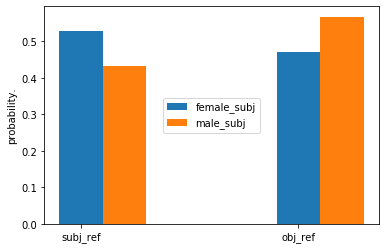

In [72]:
ref_female_subj = [compute_average(transofposs_perfective_connective2,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective2,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [73]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective2['obj_ref_female_subj'] - transofposs_perfective_connective2['subj_ref_female_subj'])
transofposs_perfective_connective2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective2['obj_ref_male_subj'] - transofposs_perfective_connective2['subj_ref_male_subj'])
transofposs_perfective_connective2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,chucked,0.636379,0.363621,-0.272757,0.734495,0.265505,-0.468990
1,flung,0.425880,0.574120,0.148240,0.399408,0.600592,0.201185
2,kicked,0.396835,0.603165,0.206330,0.691597,0.308403,-0.383194
3,lobbed,0.413242,0.586758,0.173516,0.344568,0.655432,0.310865
4,rolled,0.438398,0.561602,0.123205,0.608369,0.391631,-0.216738
5,threw,0.484860,0.515140,0.030280,0.495408,0.504592,0.009184
6,tossed,0.451741,0.548259,0.096518,0.389803,0.610197,0.220393
7,brought,0.536730,0.463270,-0.073459,0.380327,0.619673,0.239345
8,forwarded,0.606733,0.393267,-0.213467,0.316808,0.683192,0.366384
9,mailed,0.592622,0.407378,-0.185244,0.230068,0.769932,0.539864


In [74]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective2,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= -0.05730809297477992
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.13399317331219973


# Transfer of Possession (aspect: imperfective)

Hypothesis: 

We expect source / subject referent pronoun probabilties (**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than the goal / object-referent pronoun probabilities (**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective "because" due to the additional subject bias. 

### Stimuli with no prompt (ends with '.')

Examples

1. John was throwing a hat to Mary. 
2. Alice was carrying a tray to Bob.

In [75]:
transofposs_imperfective_noprompt = pd.read_csv("../results/summary/transofposs_imperfective-noprompt.csv")
transofposs_imperfective_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flinging,0.326054,0.673946,0.738109,0.261891
1,kicking,0.369606,0.630394,0.810578,0.189422
2,lobbing,0.446332,0.553668,0.751061,0.248939
3,throwing,0.349630,0.650370,0.726306,0.273694
4,tossing,0.356789,0.643211,0.736834,0.263166
5,bringing,0.422696,0.577304,0.803483,0.196517
6,forwarding,0.363893,0.636107,0.728417,0.271583
7,mailing,0.399649,0.600351,0.733739,0.266261
8,shipping,0.407190,0.592810,0.749790,0.250210
9,transmitting,0.379095,0.620905,0.681845,0.318155


In [76]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.3731524261335532
P(obj_reference |subj=female) 0.6268475712916137


In [77]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.7349430160761319
P(obj_reference |subj=male) 0.2650569855217256


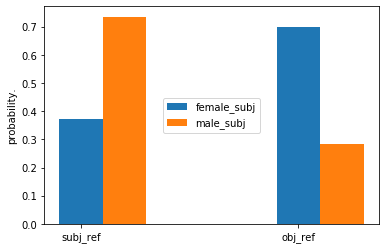

In [78]:
ref_female_subj = [compute_average(transofposs_imperfective_noprompt,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_noprompt,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [79]:
# expectation: more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(transofposs_imperfective_noprompt['subj_ref_female_subj'] - transofposs_imperfective_noprompt['obj_ref_female_subj'])
transofposs_imperfective_noprompt.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_noprompt['subj_ref_male_subj'] - transofposs_imperfective_noprompt['obj_ref_male_subj'])
transofposs_imperfective_noprompt.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_noprompt

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flinging,0.326054,0.673946,-0.347892,0.738109,0.261891,0.476218
1,kicking,0.369606,0.630394,-0.260789,0.810578,0.189422,0.621157
2,lobbing,0.446332,0.553668,-0.107335,0.751061,0.248939,0.502122
3,throwing,0.349630,0.650370,-0.300739,0.726306,0.273694,0.452612
4,tossing,0.356789,0.643211,-0.286421,0.736834,0.263166,0.473668
5,bringing,0.422696,0.577304,-0.154608,0.803483,0.196517,0.606965
6,forwarding,0.363893,0.636107,-0.272214,0.728417,0.271583,0.456834
7,mailing,0.399649,0.600351,-0.200701,0.733739,0.266261,0.467478
8,shipping,0.407190,0.592810,-0.185621,0.749790,0.250210,0.499581
9,transmitting,0.379095,0.620905,-0.241809,0.681845,0.318155,0.363690


In [80]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_noprompt,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_noprompt,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.25369514515806063
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.46988603055440625


### Stimuli with connective: "because"

Examples

1. John was throwing a hat to Mary because
2. Alice was carrying a tray to Bob because

In [81]:
transofposs_imperfective_connective1 = pd.read_csv("../results/summary/transofposs_imperfective-connective1.csv")
transofposs_imperfective_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,chucking,0.645085,0.354915,0.360629,0.639371
1,flinging,0.626985,0.373015,0.391462,0.608538
2,kicking,0.653544,0.346456,0.381121,0.618879
3,lobbing,0.498481,0.501519,0.300221,0.699779
4,rolling,0.668046,0.331954,0.479316,0.520684
5,throwing,0.613053,0.386947,0.394645,0.605355
6,tossing,0.559671,0.440329,0.315771,0.684229
7,bringing,0.698933,0.301067,0.341485,0.658515
8,forwarding,0.663475,0.336525,0.395923,0.604077
9,mailing,0.829324,0.170675,0.555393,0.444607


In [82]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective1,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective1,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.6888460156164671
P(obj_reference |subj=female) 0.3111539808869884


In [83]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective1,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective1,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.41116844415011117
P(obj_reference |subj=male) 0.5888315535297518


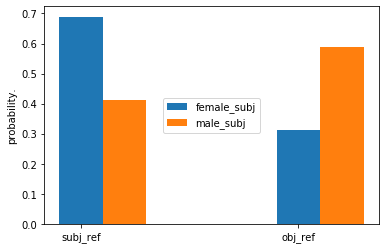

In [84]:
ref_female_subj = [compute_average(transofposs_imperfective_connective1,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective1,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective1,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective1,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [85]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective1['subj_ref_female_subj'] - transofposs_imperfective_connective1['obj_ref_female_subj'])
transofposs_imperfective_connective1.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective1['subj_ref_male_subj'] - transofposs_imperfective_connective1['obj_ref_male_subj'])
transofposs_imperfective_connective1.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective1

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,chucking,0.645085,0.354915,0.290171,0.360629,0.639371,-0.278742
1,flinging,0.626985,0.373015,0.253971,0.391462,0.608538,-0.217076
2,kicking,0.653544,0.346456,0.307088,0.381121,0.618879,-0.237759
3,lobbing,0.498481,0.501519,-0.003038,0.300221,0.699779,-0.399557
4,rolling,0.668046,0.331954,0.336093,0.479316,0.520684,-0.041367
5,throwing,0.613053,0.386947,0.226105,0.394645,0.605355,-0.210711
6,tossing,0.559671,0.440329,0.119343,0.315771,0.684229,-0.368458
7,bringing,0.698933,0.301067,0.397866,0.341485,0.658515,-0.317030
8,forwarding,0.663475,0.336525,0.326949,0.395923,0.604077,-0.208155
9,mailing,0.829324,0.170675,0.658649,0.555393,0.444607,0.110787


In [86]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective1,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective1,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.37769203472947865
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.17766310937964078


### Stimuli with connective phrase: "and, as a result,"

Examples

1. John was throwing a hat to Mary, and as a result,
2. Alice was carrying a tray to Bob, and as a result,

In [87]:
transofposs_imperfective_connective2 = pd.read_csv("../results/summary/transofposs_imperfective-connective2.csv")
transofposs_imperfective_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flinging,0.600137,0.399863,0.663846,0.336154
1,kicking,0.625039,0.374961,0.859680,0.140320
2,lobbing,0.609932,0.390068,0.639051,0.360949
3,rolling,0.450549,0.549451,0.767085,0.232915
4,throwing,0.466364,0.533636,0.670791,0.329209
5,tossing,0.581743,0.418257,0.596094,0.403906
6,bringing,0.653433,0.346567,0.520308,0.479692
7,forwarding,0.700274,0.299726,0.552595,0.447405
8,mailing,0.727954,0.272046,0.473446,0.526554
9,shipping,0.741376,0.258624,0.695982,0.304018


In [88]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective2,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.642598151401789
P(obj_reference |subj=female) 0.3574018550484821


In [89]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective2,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.631802415613223
P(obj_reference |subj=male) 0.3681975828345727


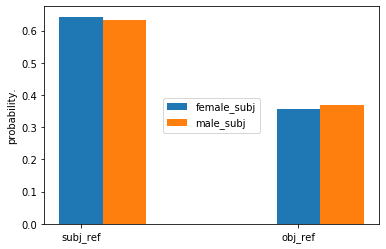

In [90]:
ref_female_subj = [compute_average(transofposs_imperfective_connective2,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective2,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [91]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective2['subj_ref_female_subj'] - transofposs_imperfective_connective2['obj_ref_female_subj'])
transofposs_imperfective_connective2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective2['subj_ref_male_subj'] - transofposs_imperfective_connective2['obj_ref_male_subj'])
transofposs_imperfective_connective2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flinging,0.600137,0.399863,0.200275,0.663846,0.336154,0.327692
1,kicking,0.625039,0.374961,0.250077,0.859680,0.140320,0.719359
2,lobbing,0.609932,0.390068,0.219864,0.639051,0.360949,0.278103
3,rolling,0.450549,0.549451,-0.098901,0.767085,0.232915,0.534169
4,throwing,0.466364,0.533636,-0.067273,0.670791,0.329209,0.341581
5,tossing,0.581743,0.418257,0.163486,0.596094,0.403906,0.192187
6,bringing,0.653433,0.346567,0.306867,0.520308,0.479692,0.040616
7,forwarding,0.700274,0.299726,0.400547,0.552595,0.447405,0.105190
8,mailing,0.727954,0.272046,0.455908,0.473446,0.526554,-0.053107
9,shipping,0.741376,0.258624,0.482752,0.695982,0.304018,0.391964


In [92]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.285196296353307
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.26360483277865027
